In [100]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
df=pd.read_csv("housing.csv")
df
#each row consider of each district from the area


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [102]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [103]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [104]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

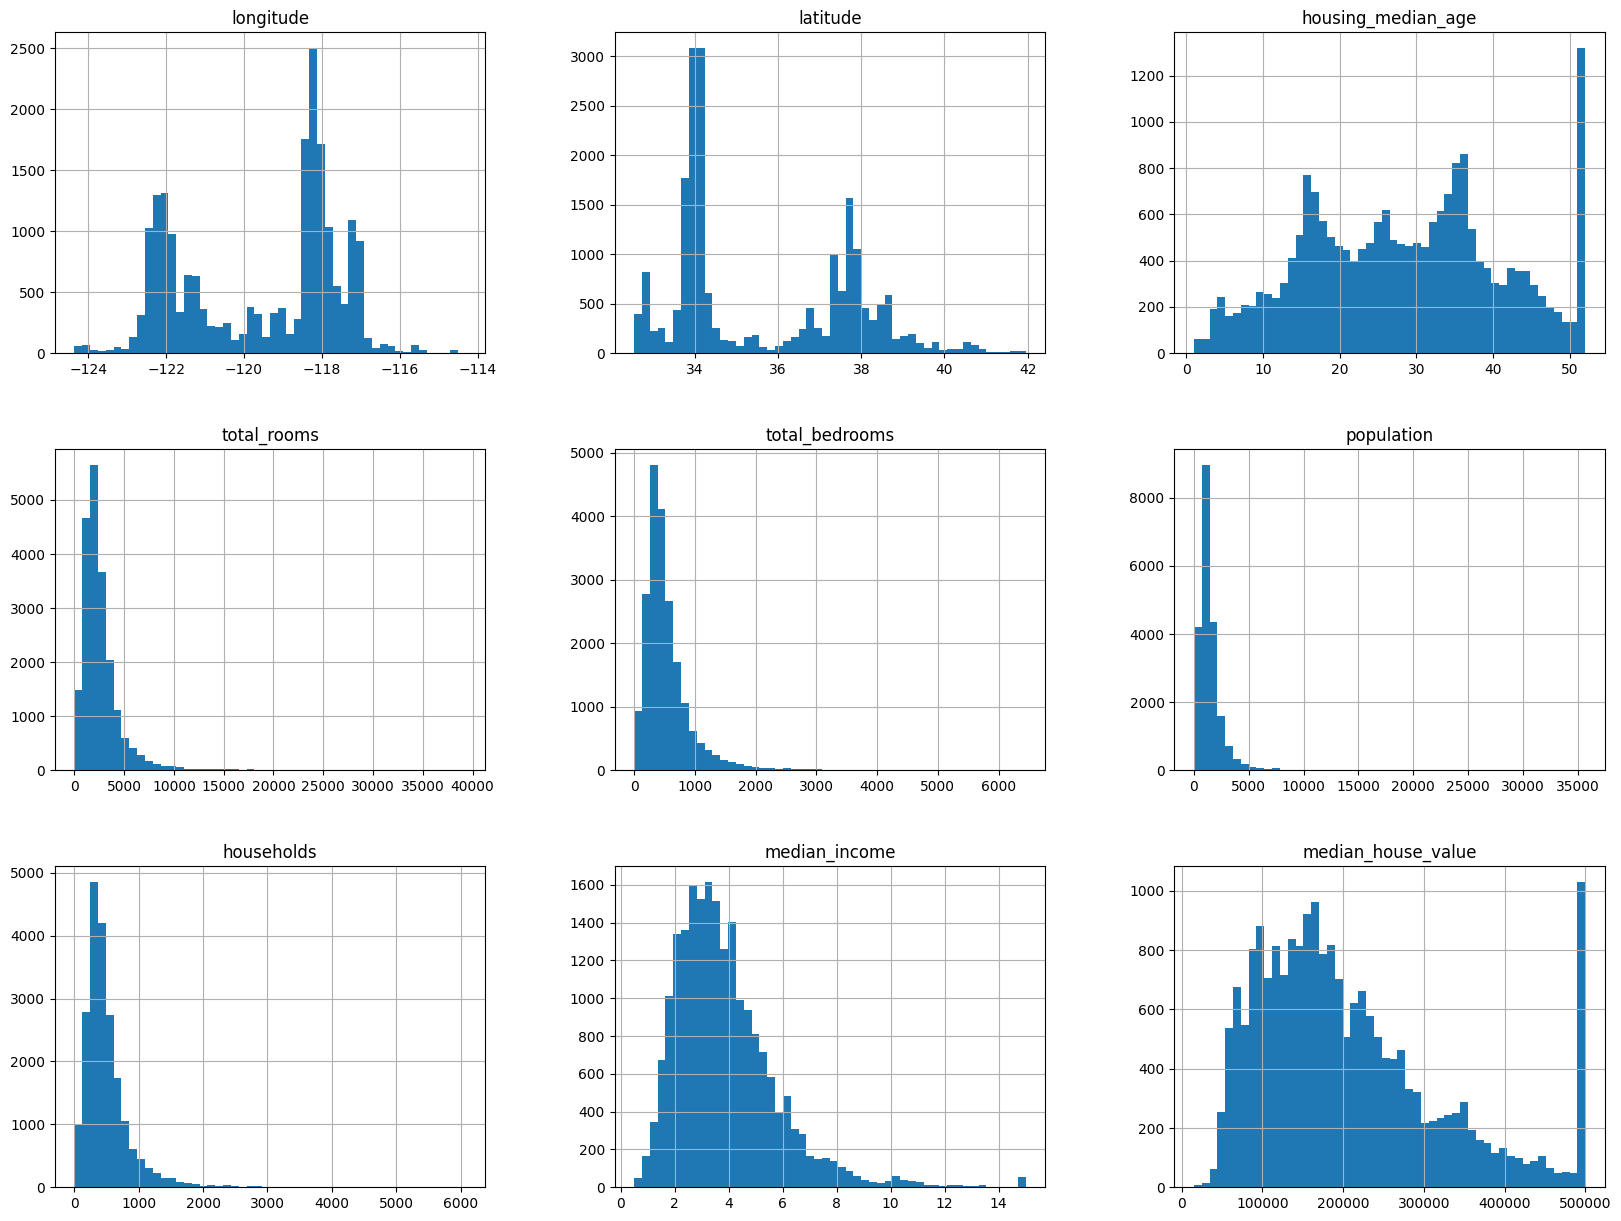

In [105]:
#plot all the graphs
df.hist(bins=50,figsize=(20,15))
#plt.show()


In [106]:
#making a test set
def split_train_test(data,test_ratio):
    np.random.seed(45)
    shuffle_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffle_indices[:test_set_size]
    train_indices=shuffle_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [107]:
train_set,test_set=split_train_test(df,0.2)
len(train_set)


16512

In [108]:
len(test_set)

4128

In [109]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)


<Axes: >

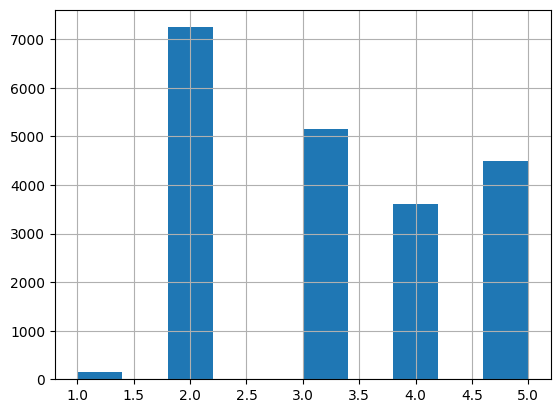

In [110]:
#categories the the median salary
bins = [0, 1, 3, 4, 5, np.inf]
labels = [1, 2, 3, 4, 5]

# Use pd.cut() to create the "income" column based on "median_income"
df["income"] = pd.cut(df["median_income"], bins=bins, labels=labels)
df["income"].hist()

In [111]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [112]:
#from sklearn.model_selection import StratifiedShuffleSplit
#split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
#for train_index,test_index in split.split(df,df["income"]):
 #   strat_train_set=df.loc[train_index]
 #   strat_test_set=df.loc[test_index]
#strat_test_set["income"].value_counts()/len(strat_test_set)
#for set_in(strat_train_set,strat_test_set):
 #   set_drop("income",axis=1,inplace=True)

In [113]:
#now copy the training set:
df=strat_train_set.copy()

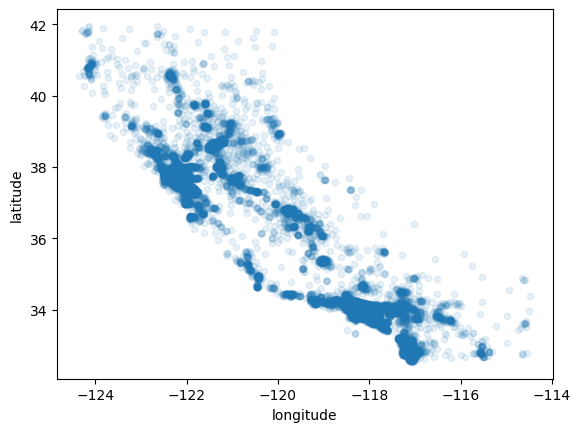

In [114]:
df.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1);
#rember just that whenever you do vizulaze your data just set alpha=0.1


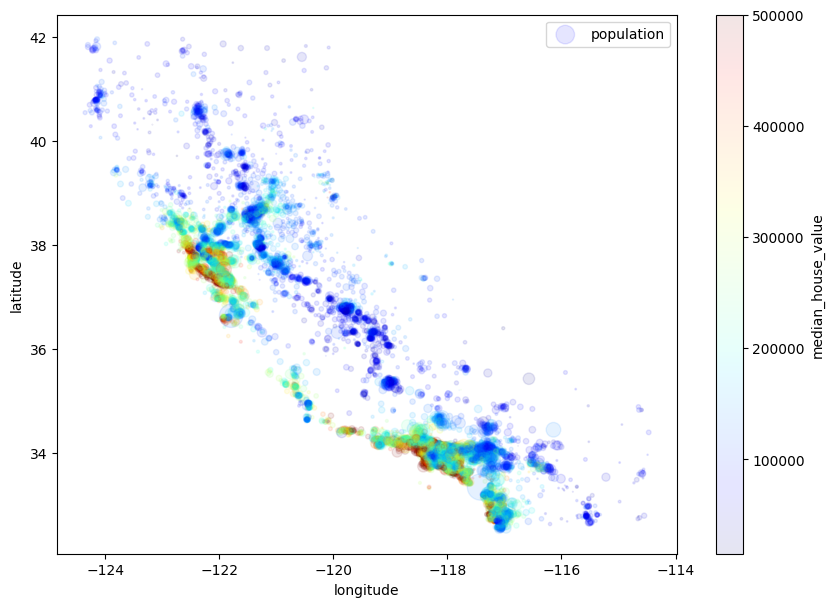

In [115]:
df.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1,
        s=df["population"]/100,label="population",figsize=(10,7),
        c="median_house_value",cmap=plt.get_cmap("jet"),colorbar="True")
plt.legend()
        

In [116]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income
15738,-122.42,37.78,17.0,1257.0,339.0,1093.0,384.0,1.8438,72500.0,NEAR BAY,2
286,-122.18,37.78,43.0,1985.0,440.0,1085.0,407.0,3.4205,136700.0,NEAR BAY,3
16648,-120.65,35.27,15.0,2365.0,538.0,1446.0,490.0,2.5129,225900.0,NEAR OCEAN,2
949,-121.93,37.72,26.0,3816.0,637.0,1935.0,642.0,4.4697,221300.0,<1H OCEAN,4
2080,-119.82,36.76,41.0,1973.0,399.0,1107.0,375.0,1.8971,66900.0,INLAND,2
...,...,...,...,...,...,...,...,...,...,...,...
18241,-122.09,37.39,43.0,2065.0,535.0,1029.0,500.0,3.7318,327700.0,NEAR BAY,3
2864,-118.91,35.37,32.0,4121.0,755.0,2590.0,721.0,3.3462,67600.0,INLAND,3
18341,-122.14,37.43,52.0,1327.0,190.0,467.0,189.0,12.5902,500001.0,NEAR BAY,5
14789,-117.13,32.58,27.0,1417.0,373.0,814.0,348.0,2.3603,195300.0,NEAR OCEAN,2


In [117]:
#looking for coorelation
correl= df.corr()
correl["median_house_value"].sort_values(ascending=False)
# near 1 is good 
# near 2 is bad

C:\Users\ARYAMAN TIWARI\AppData\Local\Temp\ipykernel_21840\1028262949.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl= df.corr()


median_house_value    1.000000
median_income         0.690784
total_rooms           0.132956
housing_median_age    0.105111
households            0.063730
total_bedrooms        0.047534
population           -0.022316
longitude            -0.047463
latitude             -0.144739
Name: median_house_value, dtype: float64

In [118]:
#expermenting awith attribute combination
df["rooms_per_household"]=df["total_rooms"]/df["households"]
df["bedrooms_per_household"]=df["total_bedrooms"]/df["households"]
df["rooms_per_household"]=df["total_rooms"]/df["households"]

In [119]:
df
correl= df.corr()
correl["median_house_value"].sort_values(ascending=False)


C:\Users\ARYAMAN TIWARI\AppData\Local\Temp\ipykernel_21840\1247085112.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl= df.corr()


median_house_value        1.000000
median_income             0.690784
rooms_per_household       0.148718
total_rooms               0.132956
housing_median_age        0.105111
households                0.063730
total_bedrooms            0.047534
population               -0.022316
bedrooms_per_household   -0.044542
longitude                -0.047463
latitude                 -0.144739
Name: median_house_value, dtype: float64

In [120]:
#create 
df=strat_train_set.drop("median_house_value",axis=1)
df_labels=strat_train_set["median_house_value"].copy()

In [121]:
#now clean the data check the attributes which has null values
#df.dropna(subset["total_bedrooms"])
df.drop("total_bedrooms",axis=1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income
15738,-122.42,37.78,17.0,1257.0,339.0,1093.0,384.0,1.8438,NEAR BAY,2
286,-122.18,37.78,43.0,1985.0,440.0,1085.0,407.0,3.4205,NEAR BAY,3
16648,-120.65,35.27,15.0,2365.0,538.0,1446.0,490.0,2.5129,NEAR OCEAN,2
949,-121.93,37.72,26.0,3816.0,637.0,1935.0,642.0,4.4697,<1H OCEAN,4
2080,-119.82,36.76,41.0,1973.0,399.0,1107.0,375.0,1.8971,INLAND,2
...,...,...,...,...,...,...,...,...,...,...
18241,-122.09,37.39,43.0,2065.0,535.0,1029.0,500.0,3.7318,NEAR BAY,3
2864,-118.91,35.37,32.0,4121.0,755.0,2590.0,721.0,3.3462,INLAND,3
18341,-122.14,37.43,52.0,1327.0,190.0,467.0,189.0,12.5902,NEAR BAY,5
14789,-117.13,32.58,27.0,1417.0,373.0,814.0,348.0,2.3603,NEAR OCEAN,2


In [122]:
#cleaning the data
#imputer helps in cleaning the data
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
df=df.drop("ocean_proximity",axis=1)
imputer.fit(df)


SimpleImputer(strategy='median')

In [123]:
imputer.statistics_

array([-118.525  ,   34.27   ,   29.     , 2116.     ,  431.     ,
       1159.     ,  406.     ,    3.54355,    3.     ])

In [124]:
df.median().values

C:\Users\ARYAMAN TIWARI\AppData\Local\Temp\ipykernel_21840\916295337.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median().values


array([-118.525  ,   34.27   ,   29.     , 2116.     ,  431.     ,
       1159.     ,  406.     ,    3.54355])

In [125]:
x=imputer.transform(df)#transforming the training set

In [126]:
#handling text
#to predict some attribute we need to convert string into number
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
df.reset_index()



,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income
0,15738,-122.42,37.78,17.0,1257.0,339.0,1093.0,384.0,1.8438,2
1,286,-122.18,37.78,43.0,1985.0,440.0,1085.0,407.0,3.4205,3
2,16648,-120.65,35.27,15.0,2365.0,538.0,1446.0,490.0,2.5129,2
3,949,-121.93,37.72,26.0,3816.0,637.0,1935.0,642.0,4.4697,4
4,2080,-119.82,36.76,41.0,1973.0,399.0,1107.0,375.0,1.8971,2
...,...,...,...,...,...,...,...,...,...,...
16507,18241,-122.09,37.39,43.0,2065.0,535.0,1029.0,500.0,3.7318,3
16508,2864,-118.91,35.37,32.0,4121.0,755.0,2590.0,721.0,3.3462,3
16509,18341,-122.14,37.43,52.0,1327.0,190.0,467.0,189.0,12.5902,5
16510,14789,-117.13,32.58,27.0,1417.0,373.0,814.0,348.0,2.3603,2


In [133]:
#custom transformation
from sklearn.base import BaseEstimator,TransformerMixin
room_ix,bedrooms_ix,population_ix,households_ix=3,4,5,6

class Combinedattribute( BaseEstimator,TransformerMixin):
    def _init_ (self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        room_per_household=X[:,rooms_ix]/X[:,household_ix]
        population_per_household=X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,room_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
             return np.c_[X,rooms_per_household,population_per_household]
attr=Combinedattribute(add_bedrooms_per_room=False)
df_extra=attr.transform(df)
            
            

TypeError: Combinedattribute() takes no arguments

In [ ]:
#train model
from sklearn.linear_model import LinearRegression
lin_reg=Linear_Regression()
lin_reg.fit()